# Steel Plates Fault Dataset – Rozšírená EDA a Predspracovanie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

csv_path = "./data/php9xWOpn.csv"
df = pd.read_csv(csv_path)
print("Original shape:", df.shape)

Original shape: (1941, 34)


## Základná štruktúra dát

In [2]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,1
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,1


In [3]:
df.shape

(1941, 34)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1941 non-null   int64  
 1   V2      1941 non-null   int64  
 2   V3      1941 non-null   int64  
 3   V4      1941 non-null   int64  
 4   V5      1941 non-null   int64  
 5   V6      1941 non-null   int64  
 6   V7      1941 non-null   int64  
 7   V8      1941 non-null   int64  
 8   V9      1941 non-null   int64  
 9   V10     1941 non-null   int64  
 10  V11     1941 non-null   int64  
 11  V12     1941 non-null   int64  
 12  V13     1941 non-null   int64  
 13  V14     1941 non-null   int64  
 14  V15     1941 non-null   float64
 15  V16     1941 non-null   float64
 16  V17     1941 non-null   float64
 17  V18     1941 non-null   float64
 18  V19     1941 non-null   float64
 19  V20     1941 non-null   float64
 20  V21     1941 non-null   float64
 21  V22     1941 non-null   float64
 22  

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,1941.0,5.711360e+02,5.206907e+02,0.0000,51.0000,4.350000e+02,1.053000e+03,1.705000e+03
V2,1941.0,6.179645e+02,4.976274e+02,4.0000,192.0000,4.670000e+02,1.072000e+03,1.713000e+03
V3,1941.0,1.650685e+06,1.774578e+06,6712.0000,471253.0000,1.204128e+06,2.183073e+06,1.298766e+07
V4,1941.0,1.650739e+06,1.774590e+06,6724.0000,471281.0000,1.204136e+06,2.183084e+06,1.298769e+07
V5,1941.0,1.893878e+03,5.168460e+03,2.0000,84.0000,1.740000e+02,8.220000e+02,1.526550e+05
V6,1941.0,1.118552e+02,3.012092e+02,2.0000,15.0000,2.600000e+01,8.400000e+01,1.044900e+04
V7,1941.0,8.296600e+01,4.264829e+02,1.0000,13.0000,2.500000e+01,8.300000e+01,1.815200e+04
V8,1941.0,2.063121e+05,5.122936e+05,250.0000,9522.0000,1.920200e+04,8.301100e+04,1.159141e+07
V9,1941.0,8.454869e+01,3.213428e+01,0.0000,63.0000,9.000000e+01,1.060000e+02,2.030000e+02
V10,1941.0,1.301937e+02,1.869099e+01,37.0000,124.0000,1.270000e+02,1.400000e+02,2.530000e+02


Je zrejmé, že niektoré atribúty predstavujú číselné hodnoty a iné sú pravdepodobne pôvodne kategorické premenné, ktoré boli zakódované pomocou one-hot encodingu.

Numerické atribúty:

V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V14, V15, V16, V17, V18, V19, V20, V22, V23, V24, V25, V26, V27

Kategorické atribúty:

V12, V13, V28, V29, V30, V31, V32, V33

Atribút V21 môže byť numerický, alebo môže ísť o kategóriu s chybnými/prepísanými hodnotami, preto nie je úplne jasné, do ktorej skupiny patrí.

## Kontrola duplicít a chýbajúcich hodnôt

In [6]:
df.isna().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
V31      0
V32      0
V33      0
Class    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

Data neobsahujú žiadne nulové ani duplicitné hodnoty

## Distribúcia cieľovej premennej

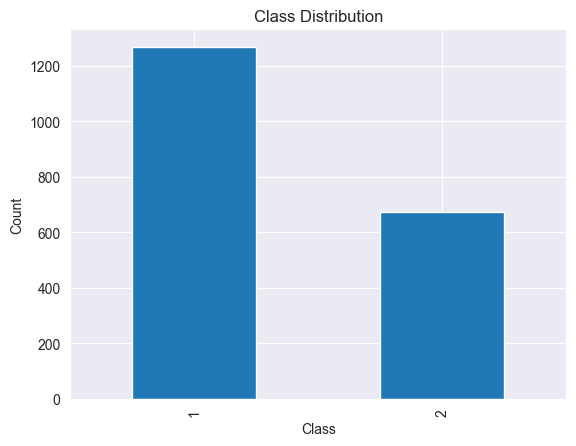

(Class
 1    1268
 2     673
 Name: count, dtype: int64,
 Class
 1    0.653272
 2    0.346728
 Name: count, dtype: float64)

In [8]:
class_counts = df['Class'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
class_counts, class_counts/len(df)

## Analýza atribútov

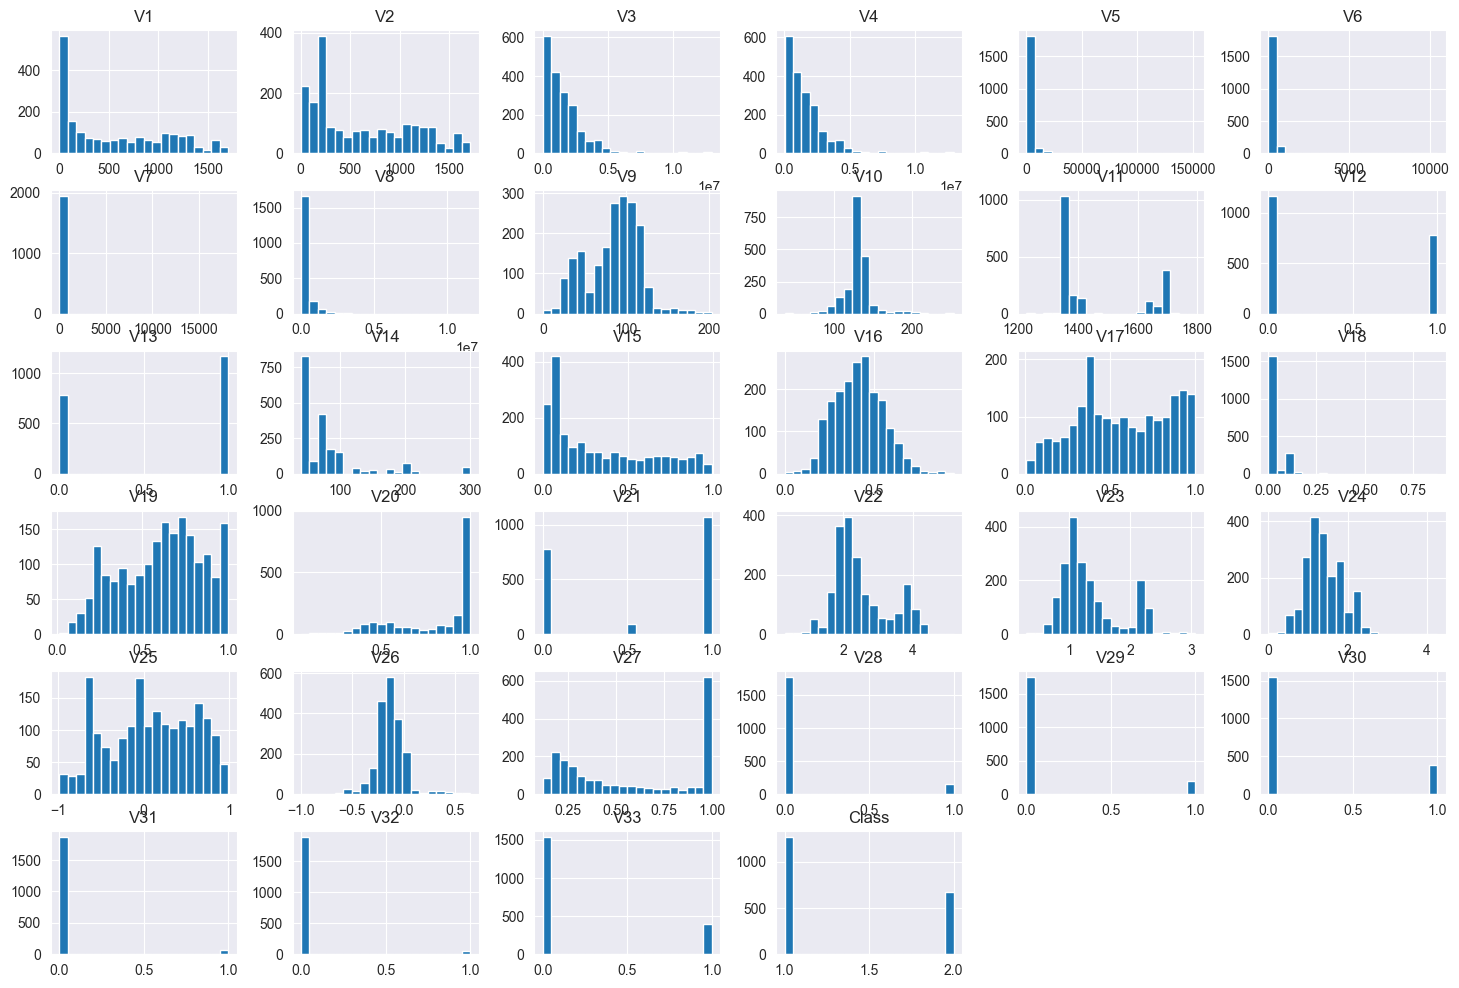

In [9]:
df.hist(bins=20, figsize=(18,12))
plt.show()

## Boxploty – detekcia extrémnych hodnôt

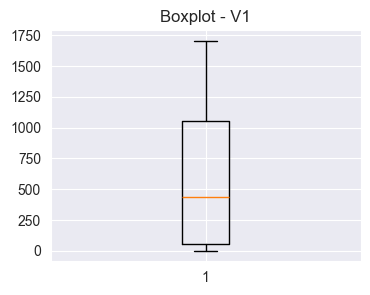

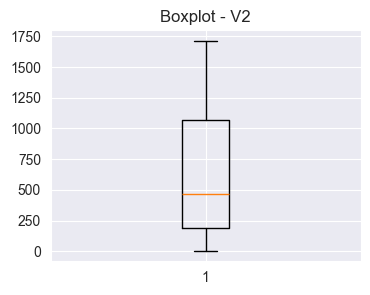

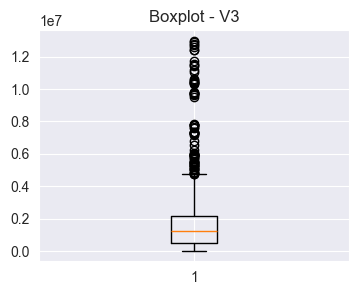

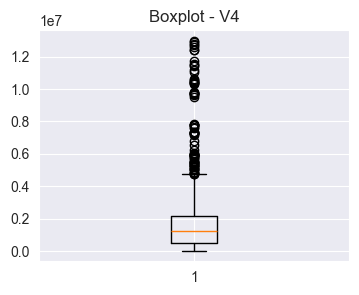

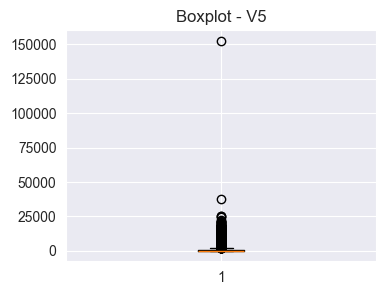

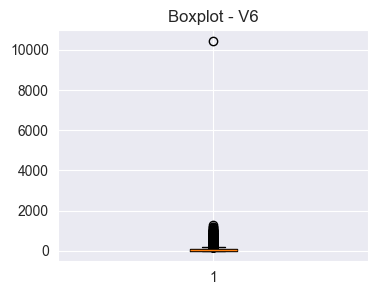

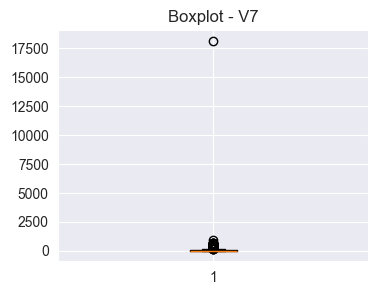

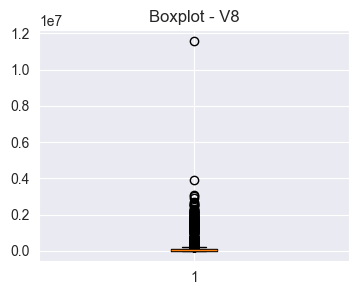

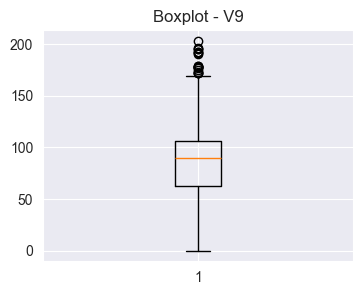

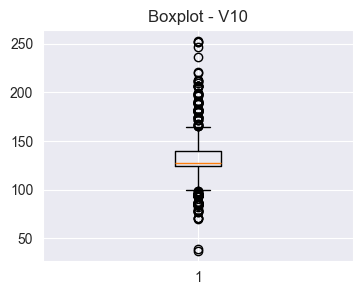

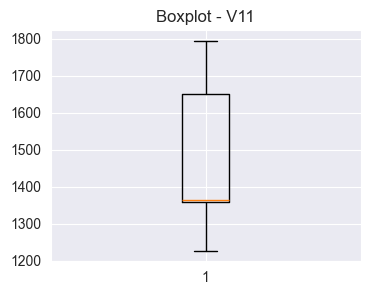

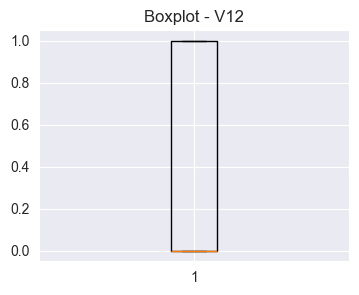

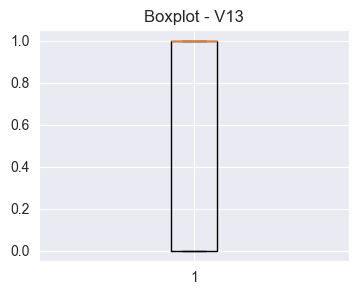

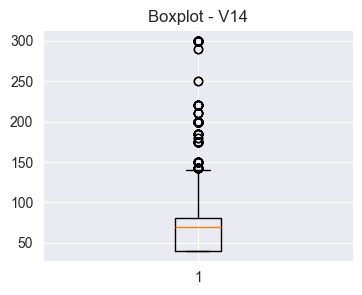

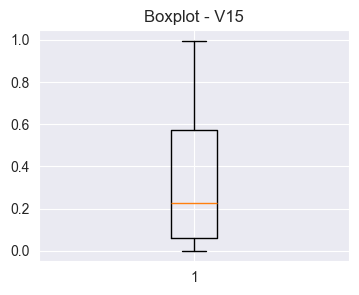

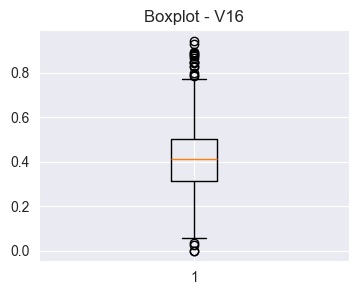

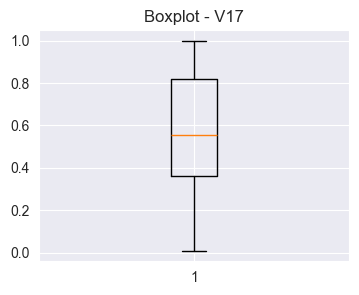

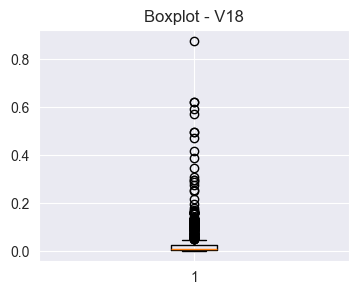

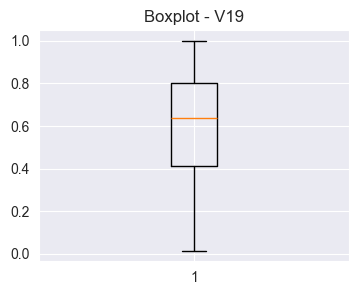

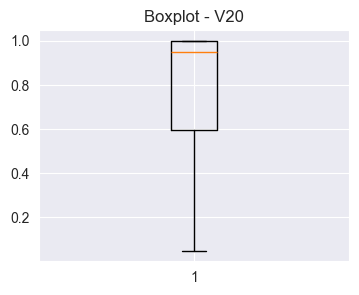

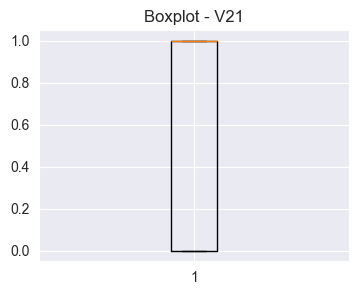

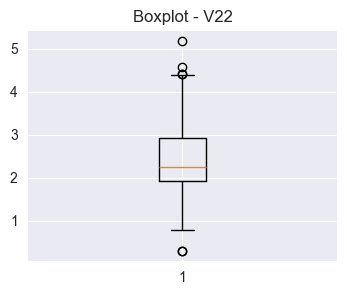

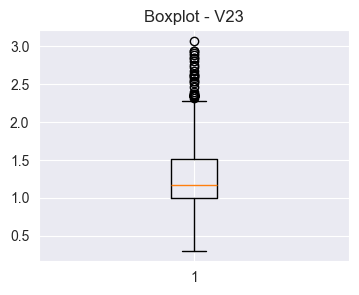

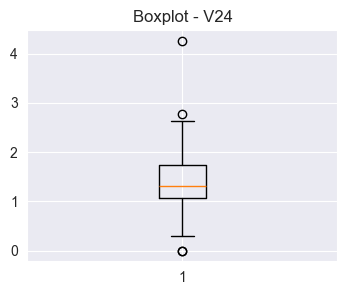

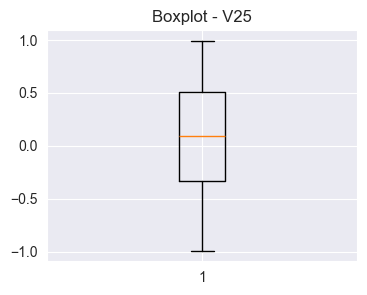

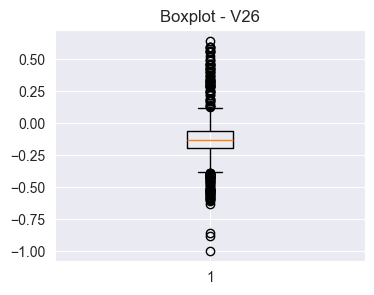

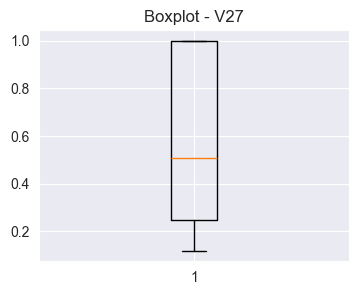

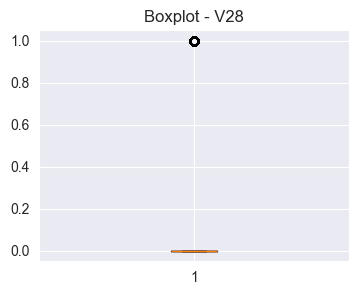

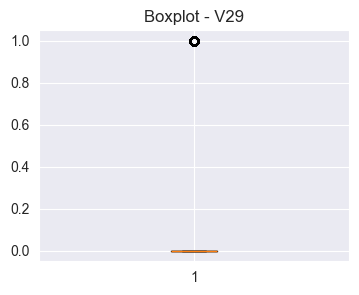

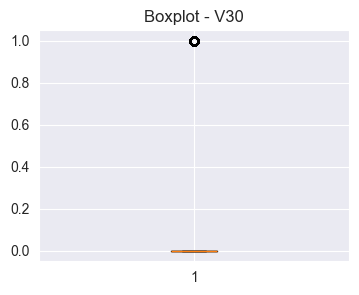

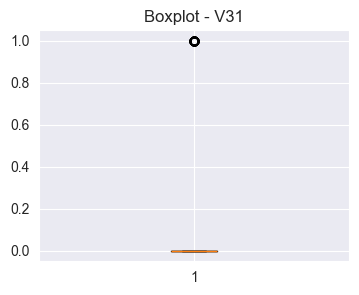

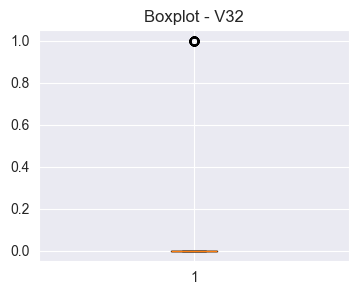

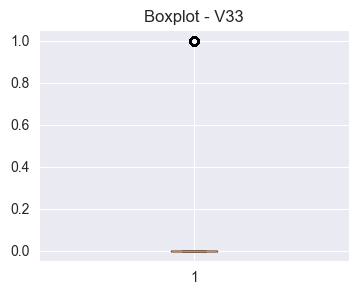

In [10]:
for col in df.columns:
    if col != 'Class':
        plt.figure(figsize=(4,3))
        plt.boxplot(df[col])
        plt.title(f'Boxplot - {col}')
        plt.show()


## Korelačná matica

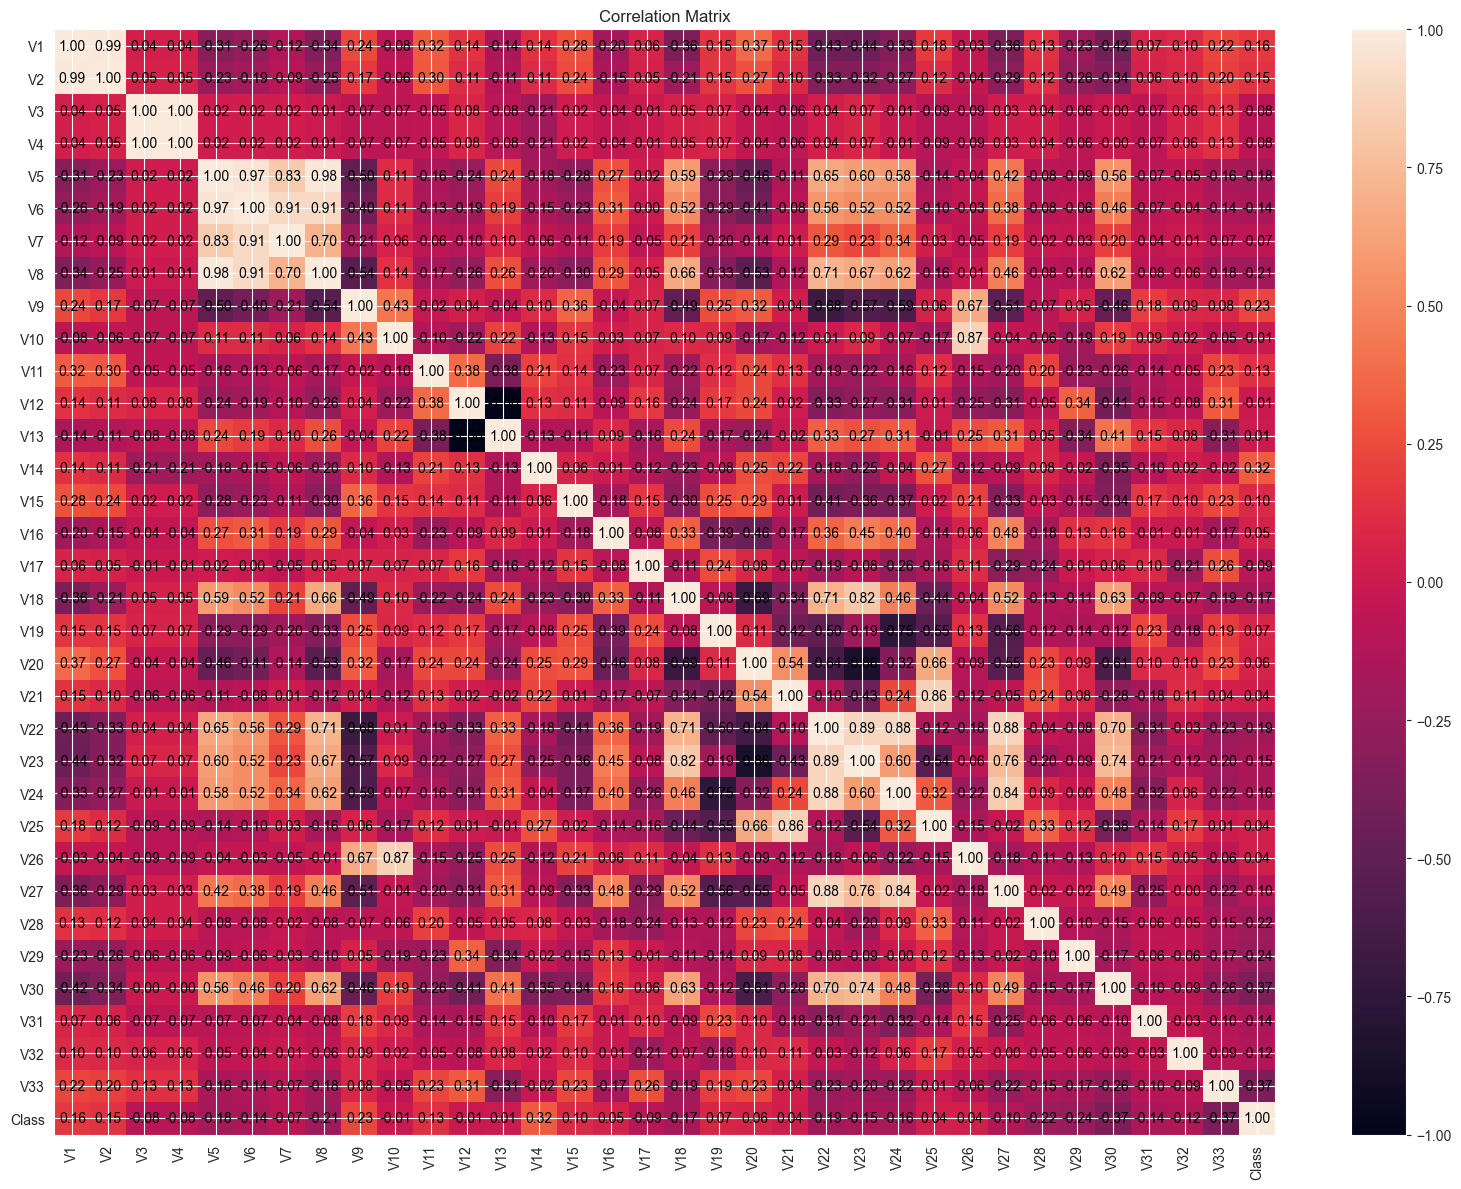

In [11]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(16,12))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.title("Correlation Matrix")

for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha="center", va="center", color="black")

plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)

plt.tight_layout()
plt.show()

Z heatmapy vieme vyčítať, že niektoré aribúty medzi sebou veľmi silno korelujú:

V1, V2: 0.99
V3, V4: 1.00
V5, V6: 0.97
V5, V8: 0.98
V12, V13: -1.00

## Rozdelenie dát a normalizácia

Odstránenie outlierov a atribútov, ktoré medzi sebou veľmi silno korelujú

In [12]:
cols_to_drop = [c for c in ["V1", "V3", "V5", "V12"] if c in df.columns]
print("Dropping columns:", cols_to_drop)
df.drop(columns=cols_to_drop, inplace=True)

num_cols = df.select_dtypes(include=[np.number]).columns.drop("Class", errors='ignore')
print("Numeric columns used for outlier removal:", num_cols)

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
mask = ~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

removed = (~mask).sum()
print("Rows removed by IQR filtering:", int(removed))
df = df[mask].reset_index(drop=True)
print("Shape after outlier removal:", df.shape)

Dropping columns: ['V1', 'V3', 'V5', 'V12']
Numeric columns used for outlier removal: Index(['V2', 'V4', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V13', 'V14', 'V15',
       'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
       'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33'],
      dtype='object')
Rows removed by IQR filtering: 1552
Shape after outlier removal: (389, 30)


In [13]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Train/Val/Test sizes:", len(X_train), len(X_val), len(X_test))

Train/Val/Test sizes: 272 58 59


Numeric columns to scale: ['V2', 'V4', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33']
Scaled shapes: (272, 29) (58, 29) (59, 29)


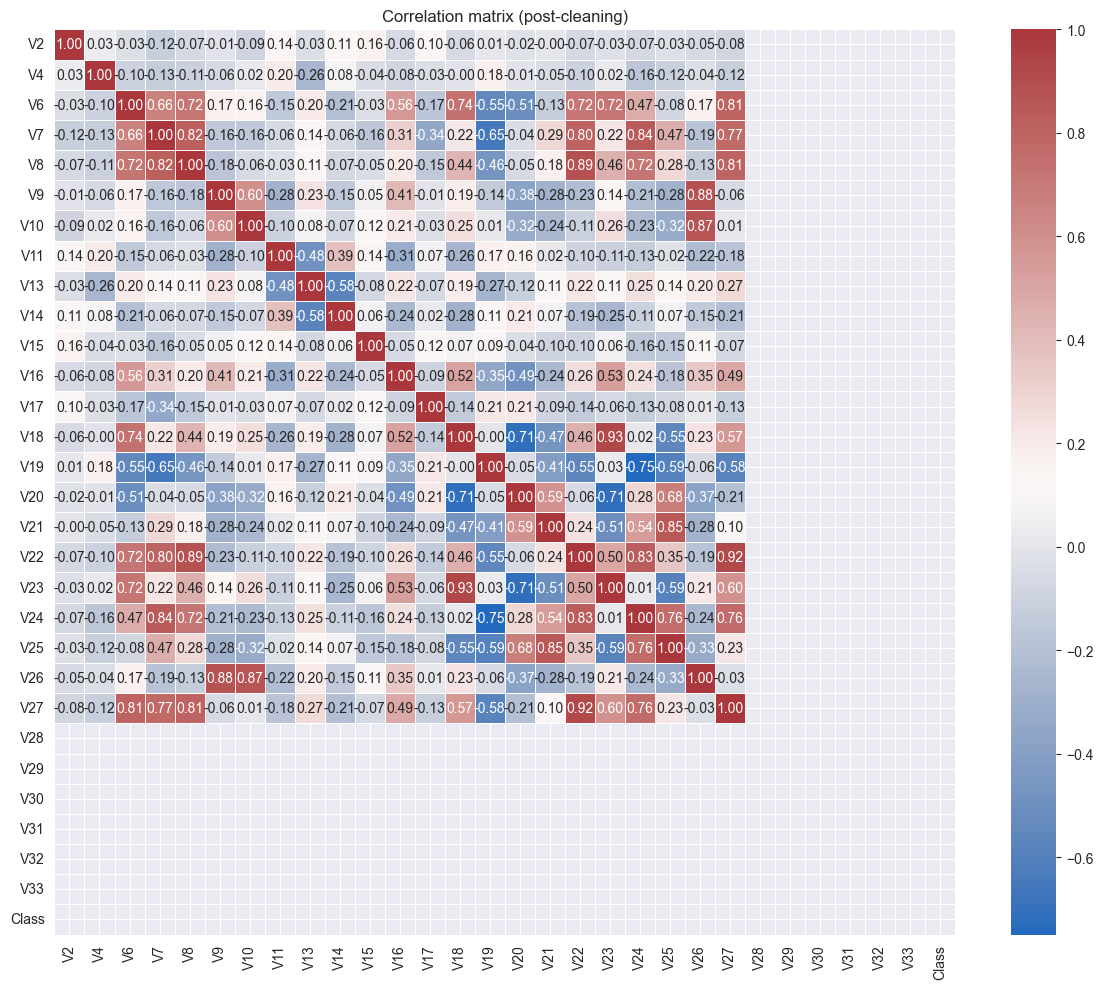

In [14]:
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns to scale:", numeric_cols)

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), list(numeric_cols))
], remainder="passthrough")

X_train_arr = preprocessor.fit_transform(X_train)
X_val_arr = preprocessor.transform(X_val)
X_test_arr = preprocessor.transform(X_test)

remaining_cols = [c for c in X_train.columns if c not in numeric_cols]
out_cols = numeric_cols + remaining_cols

X_train_scaled = pd.DataFrame(X_train_arr, columns=out_cols, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_arr, columns=out_cols, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_arr, columns=out_cols, index=X_test.index)

print("Scaled shapes:", X_train_scaled.shape, X_val_scaled.shape, X_test_scaled.shape)


corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", linewidths=0.5)
plt.title("Correlation matrix (post-cleaning)")
plt.tight_layout()
plt.show()

Rozdelenie na train test validation - 70 15 15

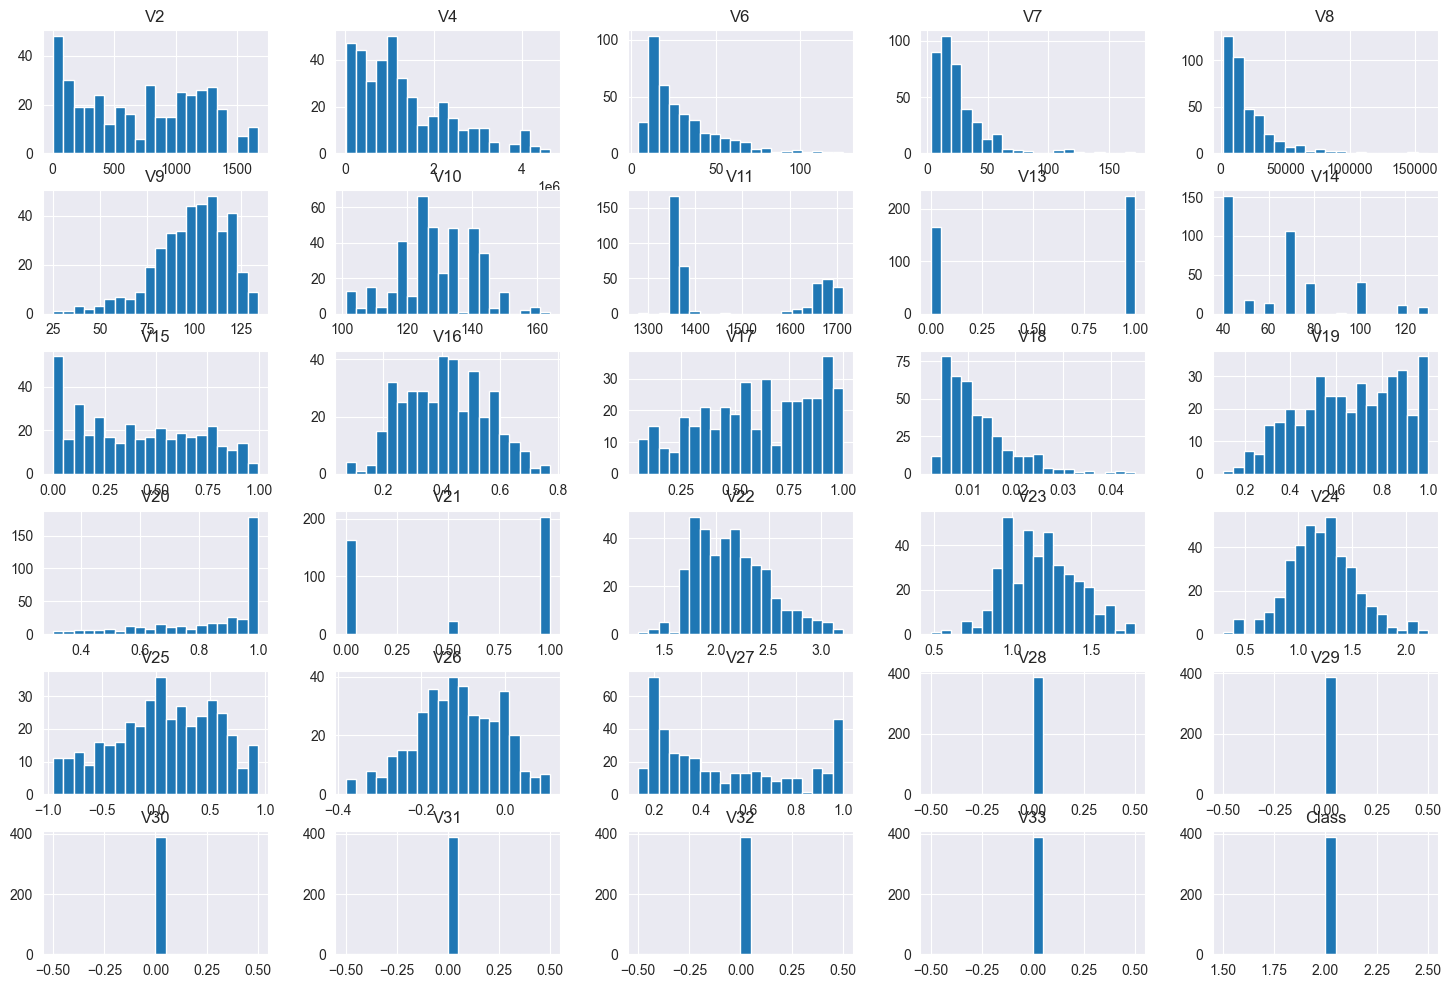

In [15]:
df.hist(bins=20, figsize=(18,12))
plt.show()



# Experiments

In [16]:
from experiments import run_experiment, grid_search, MLP

X_train = X_train_scaled.values if hasattr(X_train_scaled, "values") else np.asarray(X_train_scaled)
X_val = X_val_scaled.values if hasattr(X_val_scaled, "values") else np.asarray(X_val_scaled)

y_train = y_train.values.flatten() if hasattr(y_train, "values") else np.asarray(y_train).flatten()
y_val = y_val.values.flatten() if hasattr(y_val, "values") else np.asarray(y_val).flatten()

# baseline config
config = {
    "task": "regression",
    "seed": 42,
    "hidden_dims": [128, 64],
    "activation": "relu",
    "dropout": 0.0,
    "batchnorm": False,
    "skip": False,
    "bottleneck": False,
    "optimizer": "adam",
    "lr": 1e-3,
    "weight_decay": 0.0,
    "batch_size": 64,
    "epochs": 80
}

In [17]:
import traceback, json, time
# Use one config (baseline)
cfg = dict(config)  # copy your baseline config
cfg['tag'] = cfg.get('tag', 'diagnostic_run')

print("Starting single diagnostic run:", cfg['tag'])
t0 = time.time()
try:
    print(run_experiment(X_train, y_train, X_val, y_val, cfg, device='cpu', verbose=True))
    model, results = run_experiment(X_train, y_train, X_val, y_val, cfg, device='cpu', verbose=True)
    print("run_experiment returned successfully.")
    print("results keys:", list(results.keys()))
    print("best_val_mse:", results.get('best_val_mse'))
    print("history shape:", None if results.get('history') is None else results.get('history').shape)
    print("model_path:", results.get('model_path'))
    print("history_path:", results.get('history_path'))
except Exception as e:
    print("run_experiment raised an exception:")
    traceback.print_exc()
finally:
    print("Duration (s):", time.time() - t0)


Starting single diagnostic run: diagnostic_run
Epoch 0: train_loss=3.5353, val_rmse=1.6596
Epoch 10: train_loss=0.0768, val_rmse=0.3006
Epoch 20: train_loss=0.0279, val_rmse=0.2040
Epoch 30: train_loss=0.0160, val_rmse=0.1748
Epoch 40: train_loss=0.0110, val_rmse=0.1549
Epoch 50: train_loss=0.0080, val_rmse=0.1443
Epoch 60: train_loss=0.0061, val_rmse=0.1337
Epoch 70: train_loss=0.0047, val_rmse=0.1276
(MLP(
  (net): Sequential(
    (0): Linear(in_features=29, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
  )
  (head): Linear(in_features=64, out_features=1, bias=True)
), {'best_val_mse': 0.014955022372305393, 'history':     epoch  train_loss   val_mse  val_rmse
0       0    3.535298  2.754304  1.659610
1       1    2.376712  1.701839  1.304545
2       2    1.376562  0.847467  0.920580
3       3    0.607306  0.333427  0.577432
4       4    0.246198  0.239085  0.488964
..    ...         ...       ...       ...
75

In [22]:
from runners import run_plan_12

df_results = run_plan_12(config, X_train, y_train, X_val, y_val, device='cpu')
print(df_results[['tag','best_val_mse','final_val_rmse']])

Running: exp-01_baseline
Running: exp-02_wd-1e-5
Running: exp-03_wd-1e-4
Running: exp-04_wd-1e-3
Running: exp-05_bn
Running: exp-06_do-0.05
Running: exp-07_do-0.1
Running: exp-08_bn_do-0.1
Running: exp-09_smaller
Running: exp-10_bottleneck
Running: exp-11_skip
Running: exp-12_combined
                  tag  best_val_mse  final_val_rmse
0     exp-01_baseline      0.014955        0.122291
1      exp-02_wd-1e-5      0.014833        0.121790
2      exp-03_wd-1e-4      0.014753        0.121464
3      exp-04_wd-1e-3      0.013788        0.117421
4           exp-05_bn      0.021745        0.161489
5      exp-06_do-0.05      0.017137        0.134348
6       exp-07_do-0.1      0.017554        0.133005
7    exp-08_bn_do-0.1      0.027568        0.181756
8      exp-09_smaller      0.016221        0.127360
9   exp-10_bottleneck      0.010990        0.104833
10        exp-11_skip      0.010012        0.100060
11    exp-12_combined      0.014955        0.122291


              exp_id                tag               timestamp_utc  \
10  20251104T051229Z        exp-11_skip  2025-11-04T05:12:29.710872   
9   20251104T051229Z  exp-10_bottleneck  2025-11-04T05:12:29.213115   
3   20251104T051226Z     exp-04_wd-1e-3  2025-11-04T05:12:26.069155   
2   20251104T051225Z     exp-03_wd-1e-4  2025-11-04T05:12:25.622952   
1   20251104T051225Z     exp-02_wd-1e-5  2025-11-04T05:12:25.147355   

    duration_s  best_val_mse  final_train_loss  final_val_mse  final_val_rmse  \
10    0.496627      0.010012          0.002742       0.010012        0.100060   
9     0.452155      0.010990          0.005645       0.010990        0.104833   
3     0.444983      0.013788          0.003244       0.013788        0.117421   
2     0.474469      0.014753          0.003492       0.014753        0.121464   
1     0.442352      0.014833          0.003500       0.014833        0.121790   

                                               config               tb_logdir  \
10  {

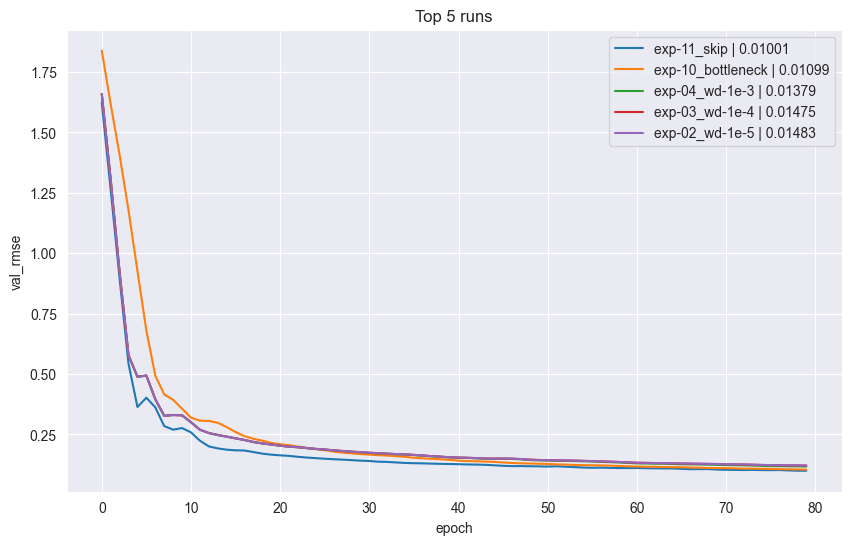

,exp_id,tag,timestamp_utc,duration_s,best_val_mse,final_train_loss,final_val_mse,final_val_rmse,config,tb_logdir,model_path,history_path,error
10,20251104T051229Z,exp-11_skip,2025-11-04T05:12:29.710872,0.496627,0.010012,0.002742,0.010012,0.100060,"{""tag"": ""exp-11_skip"", ""task"": ""regression"", ""...",runs/exp-11_skip,artifacts/model_exp-11_skip_20251104T051229Z.pt,artifacts/history_exp-11_skip_20251104T051229Z...,NaN
9,20251104T051229Z,exp-10_bottleneck,2025-11-04T05:12:29.213115,0.452155,0.010990,0.005645,0.010990,0.104833,"{""tag"": ""exp-10_bottleneck"", ""task"": ""regressi...",runs/exp-10_bottleneck,artifacts/model_exp-10_bottleneck_20251104T051...,artifacts/history_exp-10_bottleneck_20251104T0...,NaN
3,20251104T051226Z,exp-04_wd-1e-3,2025-11-04T05:12:26.069155,0.444983,0.013788,0.003244,0.013788,0.117421,"{""tag"": ""exp-04_wd-1e-3"", ""task"": ""regression""...",runs/exp-04_wd-1e-3,artifacts/model_exp-04_wd-1e-3_20251104T051225...,artifacts/history_exp-04_wd-1e-3_20251104T0512...,NaN
2,20251104T051225Z,exp-03_wd-1e-4,2025-11-04T05:12:25.622952,0.474469,0.014753,0.003492,0.014753,0.121464,"{""tag"": ""exp-03_wd-1e-4"", ""task"": ""regression""...",runs/exp-03_wd-1e-4,artifacts/model_exp-03_wd-1e-4_20251104T051225...,artifacts/history_exp-03_wd-1e-4_20251104T0512...,NaN
1,20251104T051225Z,exp-02_wd-1e-5,2025-11-04T05:12:25.147355,0.442352,0.014833,0.003500,0.014833,0.121790,"{""tag"": ""exp-02_wd-1e-5"", ""task"": ""regression""...",runs/exp-02_wd-1e-5,artifacts/model_exp-02_wd-1e-5_20251104T051224...,artifacts/history_exp-02_wd-1e-5_20251104T0512...,NaN


In [23]:
from utils import top_k, plot_top_val_rmse

print(top_k(5))

plot_top_val_rmse(5)

In [24]:
from utils import load_log

log = load_log().sort_values('best_val_mse').head(3)
top_tags = log['tag'].tolist()
top_tags

['exp-11_skip', 'exp-10_bottleneck', 'exp-04_wd-1e-3']

In [25]:
from runners import run_and_record


def seed_sweep_config(cfg, seeds=[0,1,2], device='cpu'):
    rows = []
    for s in seeds:
        cfg_s = dict(cfg)
        cfg_s['seed'] = int(s)
        cfg_s['tag'] = f"{cfg_s.get('tag','cfg')}_seed{s}"
        rows.append(run_and_record(cfg_s, X_train, y_train, X_val, y_val, device=device))
    return pd.DataFrame(rows)


for _, row in log.head(3).iterrows():
    cfg = json.loads(row['config'])
    print("Seed sweep for", row['tag'])
    df_sweep = seed_sweep_config(cfg, seeds=[0,1,2], device='cpu')
    print(df_sweep[['tag','best_val_mse','final_val_rmse']])

Seed sweep for exp-11_skip
                 tag  best_val_mse  final_val_rmse
0  exp-11_skip_seed0      0.011315        0.107248
1  exp-11_skip_seed1      0.008615        0.094680
2  exp-11_skip_seed2      0.010385        0.101908
Seed sweep for exp-10_bottleneck
                       tag  best_val_mse  final_val_rmse
0  exp-10_bottleneck_seed0      0.010497        0.103294
1  exp-10_bottleneck_seed1      0.016601        0.128846
2  exp-10_bottleneck_seed2      0.012675        0.113799
Seed sweep for exp-04_wd-1e-3
                    tag  best_val_mse  final_val_rmse
0  exp-04_wd-1e-3_seed0      0.014675        0.121139
1  exp-04_wd-1e-3_seed1      0.016967        0.130259
2  exp-04_wd-1e-3_seed2      0.013501        0.116960
